<a href="https://colab.research.google.com/github/sebastianorellana017/Colaboraty/blob/main/clasification_de_texto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv("cortedeluz.csv")

In [5]:
df.shape #entrega filas & columnas

(621, 9)

In [6]:
df.head()

,Unnamed: 0,text,Created at,target,Likes,Retweets,lang,geo,Hashtags
0,0,RT @SEC_cl: ⚠️Si eres una o uno de los afectad...,2022-07-03 6:39:34,1,0,1,es,NaN,"['CortedeLuz', 'Recoleta']"
1,1,#OtraVez!!! #CorteDeLuz #HastaCuando ya está r...,2022-07-03 4:25:11,1,0,0,es,Santiago de Chile,"['OtraVez', 'CorteDeLuz', 'HastaCuando', 'Solu..."
2,2,@CGE_Clientes qué pasa en Puente Alto qué sé c...,2022-07-02 23:06:08,1,0,0,es,Chile,"['CorteDeEnergia', 'CorteDeLuz']"
3,3,@saesa nuevamente #CorteDeLuz en sector Lingue...,2022-07-02 17:52:36,1,0,0,es,NaN,"['CorteDeLuz', 'mariquina']"
4,4,Atención: Edemsa cortará la luz en un departam...,2022-07-02 11:25:57,1,0,0,es,Mendoza,"['CorteDeLuz', 'Mendoza']"


In [7]:
print((df.target== 1).sum())#CORTE DE SUMINISTRO electricidad
print((df.target== 0).sum())#NO CORTE DE SUMINISTRO

311
310


In [8]:
#Preprocessing
import re
import string
import emoji
import spacy
#import stop_words

def remove_URL(text):
  url=re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

#https://stackoverflow.com/questions/34293875/how-to-remove

def remove_punct(text):
  translator = str.maketrans("", "",string.punctuation)
  return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
#df.head()

In [10]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")

for t in df.text:
  matches = pattern.findall(t)
  for match in matches:
    print(t)
    print(match)
    print(pattern.sub(r"", t))
  if len(matches) > 0:
    break

RT @SEC_cl: ⚠️Si eres una o uno de los afectados por el #CortedeLuz en #Recoleta haz tu reclamo en la empresa o en 👉https://t.co/MYKZoN5lBp
t
RT @SEC_cl: ⚠️Si eres una o uno de los afectados por el #CortedeLuz en #Recoleta haz tu reclamo en la empresa o en 👉


In [11]:
df["text"] = df.text.map(remove_URL) #map(lambdax:remove_URL(x))
df["text"] = df.text.map(remove_punct)
filter_char = lambda c: ord(c) < 256
df["text"] = df["text"].apply(lambda s: ''.join(filter(filter_char, s)))

In [12]:
#remove stopwords # preposiciones en español
#pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Stop Words:Astop word isacommonly used word(such as"the","a","an","in")thatasearch engine
#has been programmed to ignore,both when indexing entries for searching and when retrieving them
#as the result ofasearch query.
stop = set(stopwords.words("spanish"))

#https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
  filtered_words=[word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [14]:
df["text"] = df.text.map(remove_stopwords)

In [15]:
df.text

0      rt seccl si afectados cortedeluz recoleta haz ...
1      otravez cortedeluz hastacuando reportado probl...
2      cgeclientes pasa puente alto sé corta luz día ...
3      saesa nuevamente cortedeluz sector linguento m...
4      atención edemsa cortará luz departamento mendo...
                             ...                        
616    mejorar merchandising secciones fcbarcelona ¡f...
617    rt gerard25111977 libertad trabajo sexual ¡fir...
618                              danielredcarga jajajaja
619    munimixco pncdeguatemala mpguatemala justicia ...
620    munimixco pncdeguatemala mpguatemala justicia ...
Name: text, Length: 621, dtype: object

In [16]:
from collections import Counter

#Count unique words
def counter_word(text_col):
  count = Counter()
  for text in text_col.values:
    for word in text.split():
      count[word] += 1
    return count
    
counter=counter_word(df.text)

In [17]:
len(counter)

9

In [18]:
counter

Counter({'afectados': 1,
         'cortedeluz': 1,
         'empresa': 1,
         'haz': 1,
         'reclamo': 1,
         'recoleta': 1,
         'rt': 1,
         'seccl': 1,
         'si': 1})

In [19]:
counter.most_common()

[('rt', 1),
 ('seccl', 1),
 ('si', 1),
 ('afectados', 1),
 ('cortedeluz', 1),
 ('recoleta', 1),
 ('haz', 1),
 ('reclamo', 1),
 ('empresa', 1)]

In [20]:
num_unique_words = len(counter)

In [21]:
#Split dataset into training and validation set
train_size=int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

#split text and labels
train_sentences = train_df.text.to_numpy()
train_labels = train_df.target.to_numpy()
val_sentences = val_df.text.to_numpy()
val_labels = val_df.target.to_numpy()

In [22]:
train_sentences.shape, val_sentences.shape

((496,), (125,))

In [23]:
#Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

#vectorizeatext corpus by turning each text intoasequence of integers
tokenizer=Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences)#fit only to training

In [24]:
# cada palabra tiene su indice unico

word_index = tokenizer.word_index

In [25]:
#word_index

In [26]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [27]:
print(train_sentences[10:35])
print(train_sequences[10:35])

['rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'enelclientescl hecho 12 horas resultado seguir cortedeenergia cortedeluz'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'corte luz oroño san juan acá ven varias manzanas afectadas onda epeoficial rosario cortedeluz'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'chilquinta chilquinta600 cortedeluz varios sectores quilpué'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'cortedeluz be

In [28]:
#Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Max number of words inasequence
max_length=20
train_padded=pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")
val_padded=pad_sequences(val_sequences,maxlen=max_length,padding="post",truncating="post")
train_padded.shape,val_padded.shape

((496, 20), (125, 20))

In [29]:
train_padded[10]

array([3, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [30]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po
[3, 6, 2]
[3 6 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
#Check reversing the indices

#flip(key,value)
reverse_word_index=dict([(idx,word)for(word,idx)in word_index.items()])

In [32]:
reverse_word_index

{1: 'cortedeluz',
 2: 'luz',
 3: 'rt',
 4: 'enelclientescl',
 5: 'reclamo',
 6: 'oficialedesur',
 7: '¡firma',
 8: 'edesur',
 9: 'vez',
 10: 'petición',
 11: 'changees',
 12: 'corte',
 13: 'cortedeenergia',
 14: 'menos',
 15: 'hace',
 16: 'vía',
 17: 'si',
 18: 'sector',
 19: 'almagro',
 20: 'defensoriacaba',
 21: 'cfkargentina',
 22: 'enrearg',
 23: 'enel',
 24: 'alferdez',
 25: 'gcba',
 26: 'energiaar',
 27: 'false',
 28: 'danielscioli',
 29: 'ñuñoa',
 30: 'presidente',
 31: 'horaciorlarreta',
 32: 'mas',
 33: 'horas',
 34: 'energía',
 35: 'mes',
 36: 'seccl',
 37: 'servicio',
 38: 'enre',
 39: '22065660313',
 40: 'inoperancia',
 41: '4797982',
 42: 'sinluz',
 43: 'laflorida',
 44: 'via',
 45: 'san',
 46: 'empresa',
 47: 'hora',
 48: 'afectados',
 49: 'haz',
 50: 'día',
 51: 'pasa',
 52: 'media',
 53: 'tensión',
 54: 'cuadra',
 55: 'lindos',
 56: 'exploto',
 57: 'torre',
 58: 'seguramente',
 59: 'quedaremos',
 60: 'gobierno',
 61: 'mejorar',
 62: 'merchandising',
 63: 'secciones',
 6

In [33]:
def decode(sequence):
  return "".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [34]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[3, 6, 2]
rtoficialedesurluz


In [35]:
#Create LSTM model
from tensorflow.keras import layers

#Embedding:https://www.tensorflow.org/tutorials/text/word_embeddings
#Turns positive integers(indexes)into dense vectors of fixed size.(other approach could be one-hot-encoding)
#Word embeddings give usaway to use an efficient,dense representation in which similar words have
#asimilar encoding.Importantly,you do not have to specify this encoding by hand.An embedding isa
#dense vector of floating point values(the length of the vector isaparameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length = max_length))

#The layer will take as input an integer matrix of size(batch,input_length),
#and the largest integer(i.e. word index)in the input should be no larger than num_words(vocabulary size).
#Now model.output_shape is(None,input_length,32),where`None is the batch dimension.

model.add(layers.LSTM(64,dropout=0.1))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            288       
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 25,185
Trainable params: 25,185
Non-trainable params: 0
_________________________________________________________________


In [36]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]



model.compile(loss=loss, optimizer = optim, metrics = metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
model.fit(train_padded,train_labels,epochs=40,validation_data=(val_padded,val_labels),verbose=4)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


In [38]:
predictions = model.predict(train_padded)
predictions = [ 1 if p > 0.5 else 0 for p in predictions]

In [39]:
print(train_sentences[10:20])
print(train_labels[10:20])
print(predictions[10:20])
print(predictions)
model.get_config()

['rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'enelclientescl hecho 12 horas resultado seguir cortedeenergia cortedeluz'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'corte luz oroño san juan acá ven varias manzanas afectadas onda epeoficial rosario cortedeluz'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'chilquinta chilquinta600 cortedeluz varios sectores quilpué'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po'
 'rt bernalaqui lindos oficialedesur vez exploto torre media tensión cuadra seguramente quedaremos luz po']
[1 1 1 1 1 1 1

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'name': 'embedding_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'embeddings_constraint': None,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'input_dim': 9,
    'input_length': 20,
    'mask_zero': False,
    'name': 'embedding',
    'output_dim': 32,
    'trainable': True}},
  {'class_name': 'LSTM',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dropout': 0.1,
    'dtype': 'float32',
    'go_backwards': False,
    'implementation': 2,
    'kernel_constraint': No

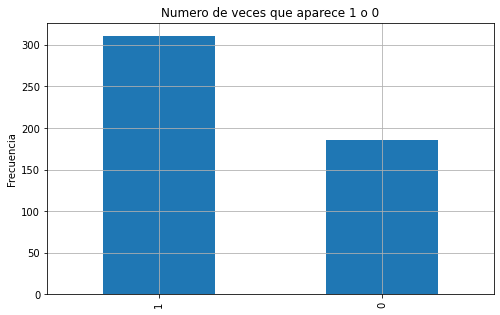

In [40]:
#
fig, ax = plt.subplots(figsize = (8,5))
pd.value_counts(train_df['target']).plot(kind="bar")
ax.set_title('Numero de veces que aparece 1 o 0')
ax.set_ylabel('Frecuencia')
ax.grid(True)
plt.show()

In [41]:
model.get_weights()

[array([[ 4.95052300e-02,  3.27188037e-02, -5.88628016e-02,
          3.37943621e-03,  4.46306868e-03, -7.23009557e-02,
          2.39074286e-02,  1.81099132e-03, -3.03195585e-02,
         -2.74513271e-02, -5.99814728e-02, -5.95592149e-02,
         -1.33304549e-02,  1.79836974e-02,  4.53732572e-02,
         -1.43371923e-02, -1.28288763e-02, -3.49546373e-02,
         -6.20112615e-03,  2.18115207e-02, -1.11737950e-02,
         -6.17308775e-04,  5.24310069e-03, -1.26257930e-02,
          1.62634626e-02,  1.36055406e-02,  1.53249819e-02,
          2.17294320e-02, -1.63926389e-02, -1.38792209e-02,
         -3.30932848e-02,  4.00959067e-02],
        [-1.30254552e-01, -7.94816986e-02,  1.25443637e-01,
          6.52001053e-02, -2.38539558e-02,  1.40631586e-01,
          1.28269657e-01, -8.99749100e-02,  5.85425869e-02,
          5.07707223e-02,  6.84288964e-02,  6.83133081e-02,
          1.66809499e-01, -7.70542398e-02, -4.86253239e-02,
          1.24124072e-01,  1.42379805e-01,  6.66255429e-